In [32]:
# Required packages
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 220.2 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 245.8 kB/s eta 0:00:52
     --------------------------------------- 0.1/12.8 MB 403.5 kB/s eta 0:00:32
     --------------------------------------- 0.1/12.8 MB 437.6 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 448.2 kB/s eta 0:00:29
      -------------------------------------- 0.2/12.8 MB 718.0 kB/s eta 0:00:18
      -------------------------------------- 0.2/12.8 MB 718.0 kB/s eta 0:00:18
     - -------------------------------------- 0.5/12.8 MB 1.0 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:12
     -- ------------------------------------- 0.7/12.8 MB 

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [7]:
df = pd.read_csv('twitter_sentiment.csv', header=None,index_col=0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df = df[[2,3]].reset_index(drop=True)

In [9]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [11]:
df.isnull().sum()
# drop null value
df.dropna(inplace=True)
# need to do preprocessing because of null values

In [12]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(72883, 2113)

In [13]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [14]:

df.sample(10)

,sentiment,text
42124,Positive,. on @YouTube : PUBG BEST KILLS | 48 SQUAD KIL...
49228,Irrelevant,"12 My survival mentality at The FIFA stinks, c..."
42993,Irrelevant,@Twitch the top popular stream until now is s...
8234,Irrelevant,Cassie got everyone to play a Cajun quiz about...
67830,Positive,Playing through the Witcher 3 again and the No...
44893,Neutral,Facebook tries to contain damage as Verizon jo...
5987,Neutral,Beautiful Video. Powerful so more more people ...
46990,Positive,Good News News!
30780,Neutral,Fuck this. Listen to me: FUCK. THIS. Tons of f...
56023,Negative,@ UbisoftSupport @ Rainbow6Game @ UbisoftSuppo...


In [15]:
df['sentiment'].value_counts()

Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: sentiment, dtype: int64

### Preprocessing

In [16]:
# !pip install preprocess_kgptalkie
import preprocess_kgptalkie as ps

df.columns

ModuleNotFoundError: No module named 'en_core_web_sm'

In [ ]:
df = ps.get_basic_features(df)

NameError: name 'ps' is not defined

In [ ]:
df.columns # will get 8 basic features

In [18]:
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=False)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='sentiment'>

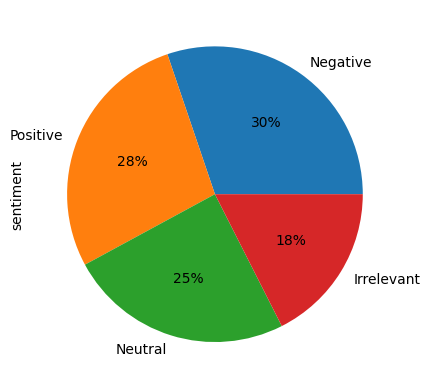

In [19]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [20]:
## WordCloud Visualization

# !pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

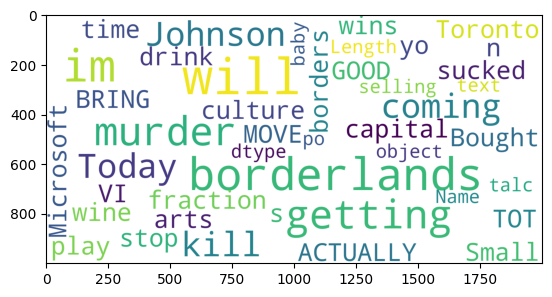

In [21]:
wordcloud = WordCloud(background_color='white', stopwords = stopwords,
                        max_words=300, max_font_size=40, scale=5).generate(str(df['text']))


plt.imshow(wordcloud)

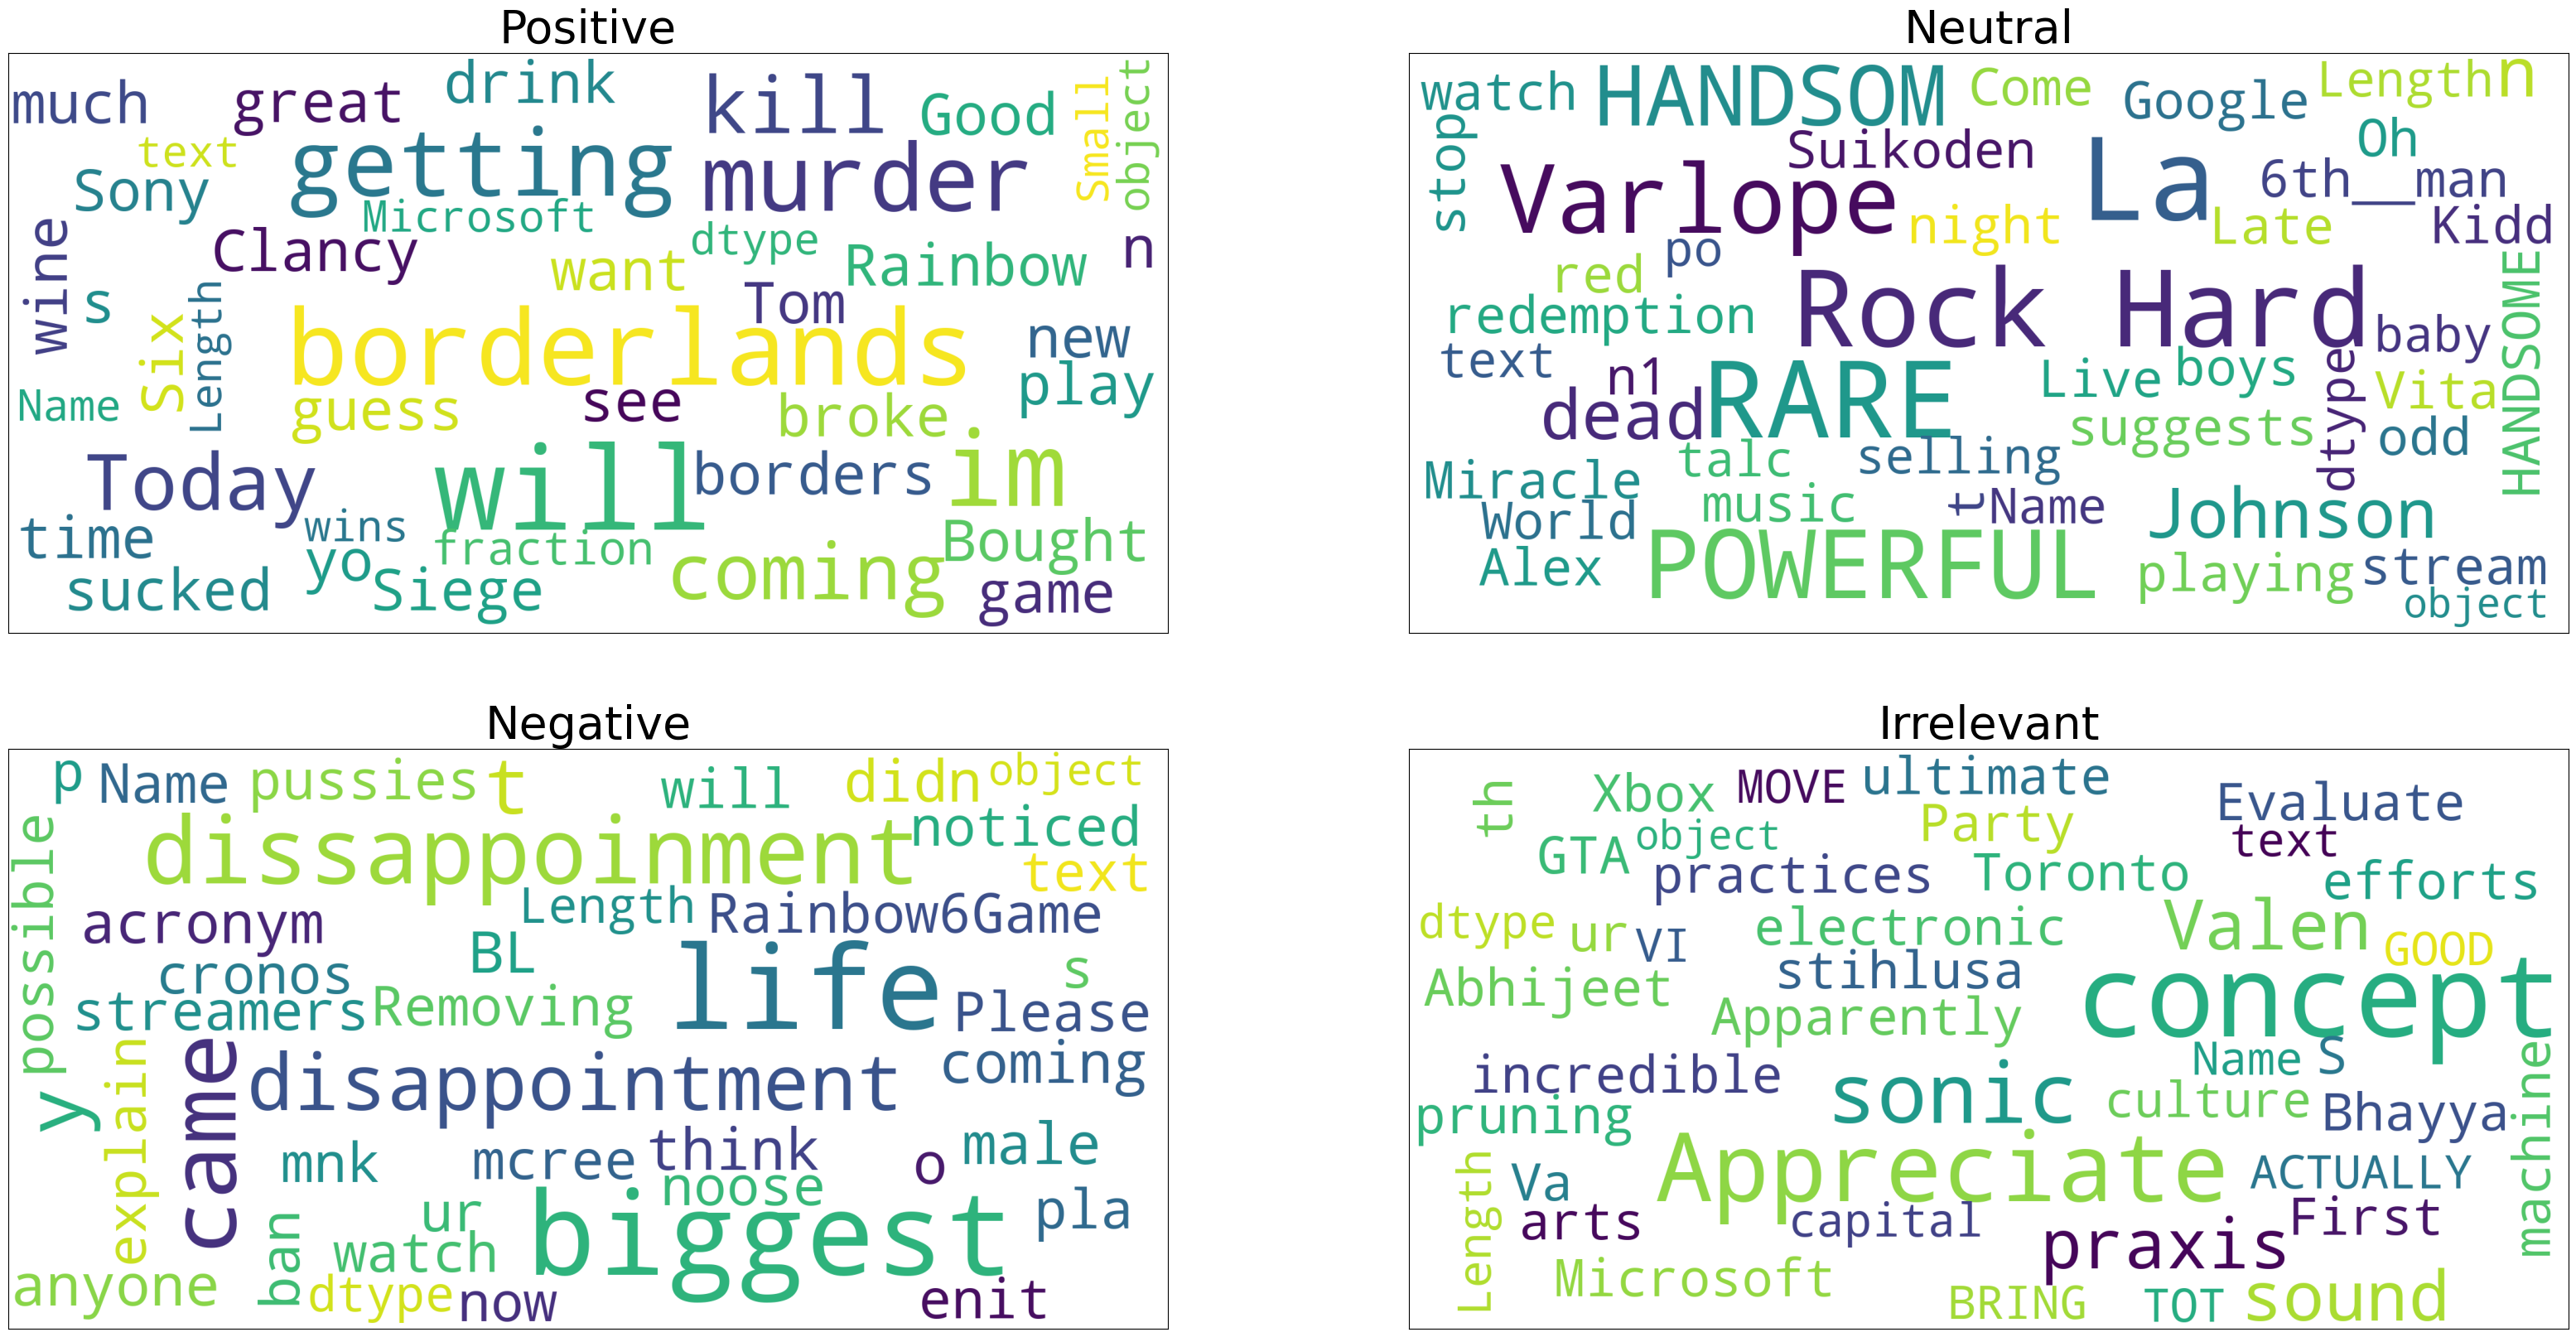

In [22]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)

    data = df[df['sentiment']==sent]['text']

    wordcloud = WordCloud(background_color='white', stopwords = stopwords,
                        max_words=300, max_font_size=40, scale=5).generate(str(data))

    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

### Data Cleaning

In [24]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

NameError: name 'ps' is not defined

In [26]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=0)


ModuleNotFoundError: No module named 'sklearn'

In [27]:
X_train.shape, X_test.shape

NameError: name 'X_train' is not defined

### Model Building and Testing

In [ ]:
from sklearn.feature_extraction.text import TfidVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [ ]:
clf = Pipeline([('tfid', TfidfVectorizer(stop_words= stopwords)), ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

In [29]:
#evaluation
from sklearn.metrics import classification_report

y_pred = clf.predict(X_train)
print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'sklearn'

In [28]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl",'wb'))

NameError: name 'clf' is not defined

In [ ]:
clf.predict(['let me not upset you'])